In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Load your data
# Replace 'your_data.csv' with your actual data file
data = pd.read_csv(r'C:\Users\K Madan Mohan Reddy\Desktop\Loan_default.csv')
data.drop(['LoanID'], axis=1, inplace=True)
data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [24]:
data


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [8]:

# Preprocess the data
data['Education'] = data['Education'].replace("High School", 1)
data['Education'] = data['Education'].replace("Bachelor's", 2)
data['Education'] = data['Education'].replace("Master's", 3)
data['Education'] = data['Education'].replace("PhD", 4)
data['EmploymentType'] = data['EmploymentType'].replace('Unemployed', 1)
data['EmploymentType'] = data['EmploymentType'].replace('Part-time', 2)
data['EmploymentType'] = data['EmploymentType'].replace('Full-time', 3)
data['EmploymentType'] = data['EmploymentType'].replace('Self-employed', 4)
data['MaritalStatus']=data['MaritalStatus'].replace('Single',1)
data['MaritalStatus']=data['MaritalStatus'].replace('Married',2)
data['MaritalStatus']=data['MaritalStatus'].replace('Divorced',3)
data['HasMortgage'] = data['HasMortgage'].replace('No', 0)
data['HasMortgage'] = data['HasMortgage'].replace('Yes', 1)
data['HasDependents']=data['HasDependents'].replace('Yes',1)
data['HasDependents']=data['HasDependents'].replace('No',0)
data['HasCoSigner']=data['HasCoSigner'].replace('Yes',1)
data['HasCoSigner']=data['HasCoSigner'].replace('No',0)
data['LoanPurpose']=data['LoanPurpose'].replace('Auto',1)
data['LoanPurpose']=data['LoanPurpose'].replace('Business',2)
data['LoanPurpose']=data['LoanPurpose'].replace('Education',3)
data['LoanPurpose']=data['LoanPurpose'].replace('Home',4)
data['LoanPurpose']=data['LoanPurpose'].replace('Other',5)


# Drop the 'LoanID' column

C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_60176\4029298441.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Education'] = data['Education'].replace("PhD", 4)
C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_60176\4029298441.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['EmploymentType'] = data['EmploymentType'].replace('Self-employed', 4)
C:\Users\K Madan Mohan Reddy\AppData\Local\Temp\ipykernel_60176\4029298441.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and w

In [4]:
# data.drop(['LoanID'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  int64  
 10  EmploymentType  255347 non-null  int64  
 11  MaritalStatus   255347 non-null  int64  
 12  HasMortgage     255347 non-null  int64  
 13  HasDependents   255347 non-null  int64  
 14  LoanPurpose     255347 non-null  int64  
 15  HasCoSigner     255347 non-null  int64  
 16  Default         255347 non-null  int64  
dtypes: float64

In [9]:
# Prepare the data
X = data.drop('Default', axis=1)
y = data['Default']

# Create a pipeline that fits the model
model = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model.fit(X_train, y_train)

# Get default probabilities
default_probabilities = model.predict_proba(X_test)[:, 1]

# Get the corresponding Loan Amounts
loan_amounts = X_test['LoanAmount']
# Save the trained model using joblib
joblib.dump(model, 'loan_default_model.pkl')

# Optionally, evaluate your model
accuracy = model.score(X_test, y_test)
print(f'Model accuracy: {accuracy*100:.2f}%')

Model accuracy: 80.09%


In [35]:
X_train

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
137187,18,137576,209136,846,26,2,10.47,60,0.81,1,4,1,1,0,2,0
230334,47,57194,5970,748,30,2,19.72,36,0.73,1,1,3,0,1,3,0
19687,26,84328,95065,453,7,2,24.25,12,0.45,3,4,2,0,0,5,1
106509,53,49795,229582,533,107,3,14.44,60,0.17,2,4,1,1,0,1,1
242291,49,115450,22072,840,0,4,24.48,12,0.11,2,2,1,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,40,116623,161673,651,79,2,23.44,12,0.87,2,2,3,0,0,4,1
103694,67,62958,189499,460,77,3,9.29,36,0.11,2,4,1,0,0,2,1
131932,62,34372,59645,524,94,3,9.72,60,0.24,4,3,1,1,0,1,0
146867,44,146262,198454,489,7,4,4.31,48,0.30,1,4,2,1,0,4,0


In [37]:
# Import necessary libraries
import joblib
import pandas as pd

# Load your trained model
model = joblib.load('loan_default_model.pkl')

# Create a dummy example with the specified order
dummy_example = {
    'Age': [46],
    'Income': [84208],
    'LoanAmount': [129188],
    'CreditScore': [451],
    'MonthsEmployed': [26],
    'NumCreditLines': [3],
    'InterestRate': [21.17],
    'LoanTerm': [24],
    'DTIRatio': [0.31],
    'Education': [3],  # Master's
    'EmploymentType': [1],  # Unemployed
    'MaritalStatus': [3],  # Divorced
    'HasMortgage': [1],  # Yes
    'HasDependents': [1],  # Yes
    'LoanPurpose': [1],  # Auto
    'HasCoSigner': [0]  # No
}

# Convert the dummy example to a DataFrame
dummy_df = pd.DataFrame(dummy_example)

# Ensure the DataFrame columns are in the correct order
expected_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 
                    'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 
                    'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
dummy_df = dummy_df[expected_columns]

# Make prediction
prediction = model.predict(dummy_df)

# Print the prediction
print(f'The prediction for the dummy example is: {prediction[0]}')

The prediction for the dummy example is: 1


In [23]:
data.to_csv('Data.csv', index=False)

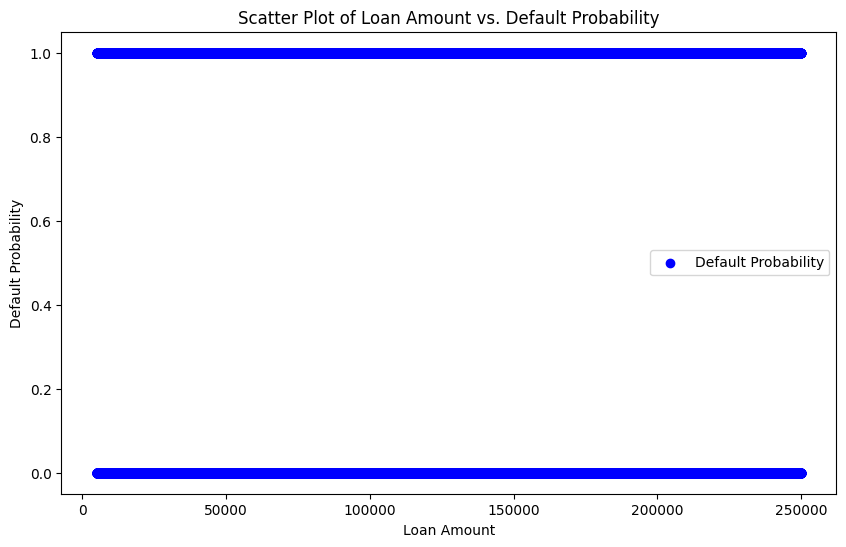

In [21]:
assert len(loan_amounts) == len(default_probabilities), "Loan amounts and default probabilities must be the same size"

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(loan_amounts, default_probabilities, c='blue', label='Default Probability')

# Add labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Default Probability')
plt.title('Scatter Plot of Loan Amount vs. Default Probability')
plt.legend()
plt.savefig('static/scatter_plot.png')

# Show plot
plt.show()

In [16]:


# Calculate correlations between all features and default probability
correlation_matrix = data.corr()
print(correlation_matrix["Default"].sort_values(ascending=False))

Default           1.000000
InterestRate      0.131273
LoanAmount        0.086659
NumCreditLines    0.028330
DTIRatio          0.019236
MaritalStatus     0.007902
LoanTerm          0.000545
LoanPurpose      -0.010096
HasMortgage      -0.022856
Education        -0.028282
EmploymentType   -0.030612
CreditScore      -0.034166
HasDependents    -0.034678
HasCoSigner      -0.039109
MonthsEmployed   -0.097374
Income           -0.099119
Age              -0.167783
Name: Default, dtype: float64


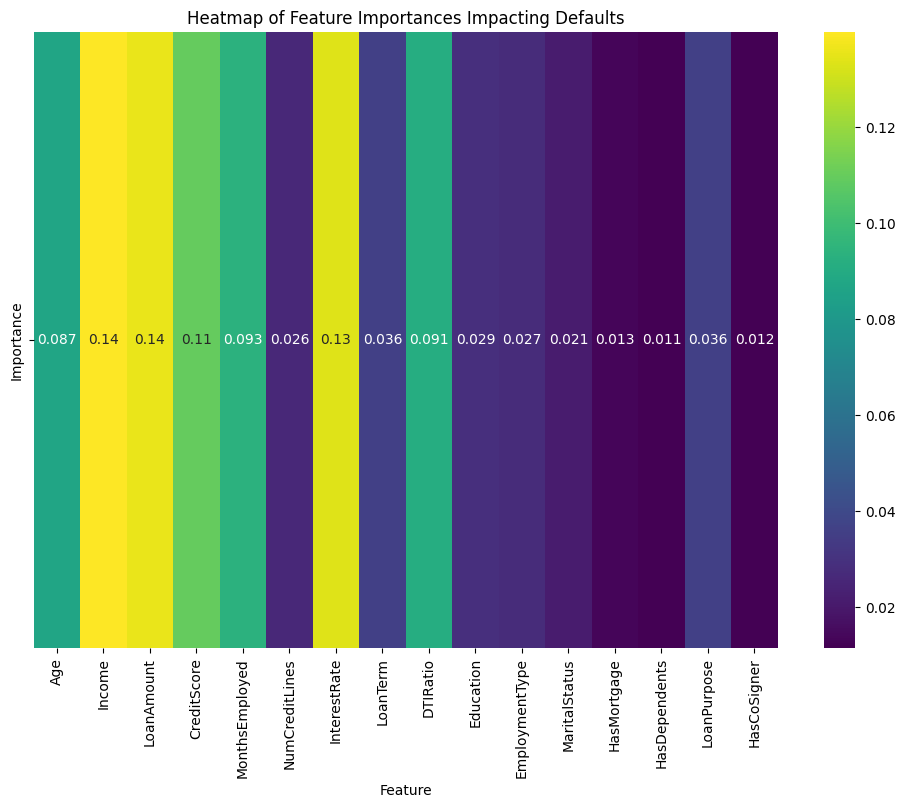

In [14]:
import seaborn as sns

feature_importances = model.named_steps['classifier'].feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

plt.figure(figsize=(12, 8))
sns.heatmap(feature_importances_df.set_index('Feature').T, annot=True, cmap='viridis')

# Add title
plt.title('Heatmap of Feature Importances Impacting Defaults')

# Show plot
plt.show()

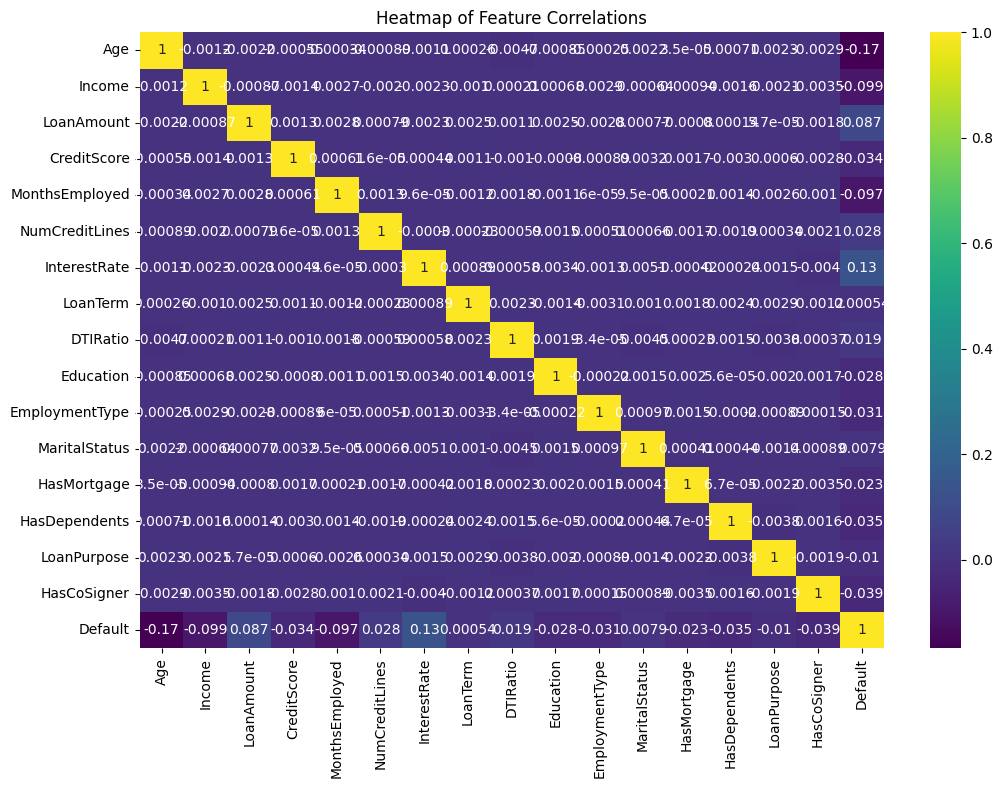

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

# Save the heatmap as an image file
plt.title('Heatmap of Feature Correlations')
plt.savefig('static/heatmap.png')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

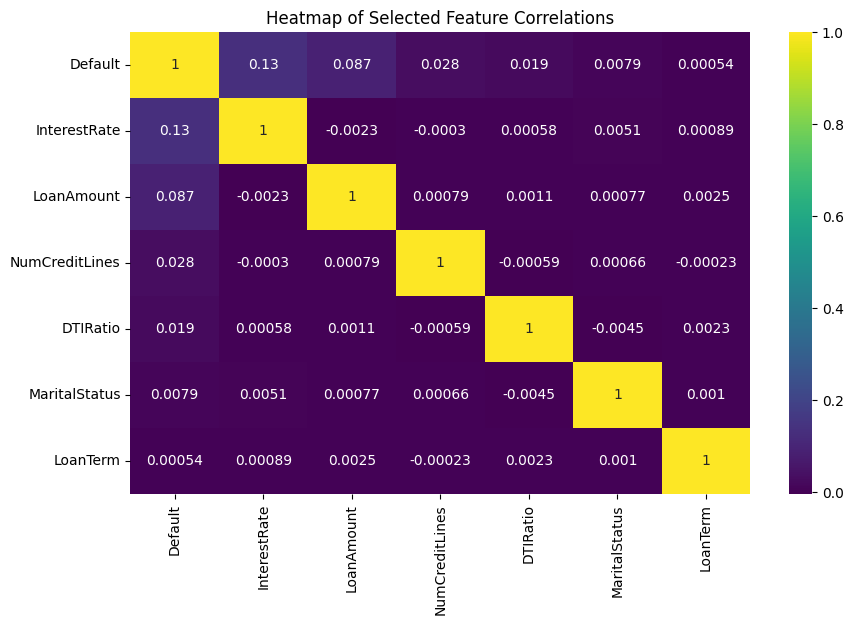

In [20]:

# Select the specified columns
selected_columns = ['Default', 'InterestRate', 'LoanAmount', 'NumCreditLines', 'DTIRatio', 'MaritalStatus', 'LoanTerm']

# Generate heatmap for the selected columns
plt.figure(figsize=(10, 6))
sns.heatmap(data[selected_columns].corr(), annot=True, cmap='viridis')

# Save the heatmap as an image file
plt.title('Heatmap of Selected Feature Correlations')
plt.savefig('static/heatmap_selected.png')
plt.show